# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
# we only will work with two features for visualising purposes
# there is no 'y' because we don´t have a dependent variable

## Using the elbow method to find the optimal number of clusters

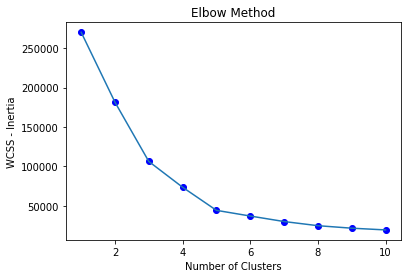

In [27]:
from sklearn.cluster import KMeans
wcss = [] # wcss = Within-Cluster Sum of Squares
# Sum of squared distances of samples to their closest cluster center.
for n in range(1, 11):
    # k-means++ for better random cluster center starting point
    kmeans = KMeans(n_clusters=n, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ = WCSS
plt.plot(range(1, 11), wcss)
plt.scatter(range(1, 11), wcss, c = 'blue')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS - Inertia')
plt.show()

## Training the K-Means model on the dataset

In [32]:
# we pick the number of clusters from the elbow method graph
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
# fit_predic: compute cluster centers and predict cluster index for each sample
y_kmeans = kmeans.fit_predict(X) # one cluster index for each observation

In [34]:
print(y_kmeans)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


## Visualising the clusters

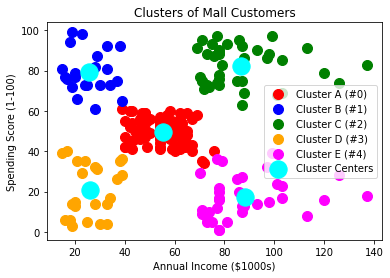

In [41]:
# cluster indexes from 0 to 4 in y_kmeans (5 clusters)
# X axis: index 0 for the 1st column in the dataset (Income)
# Y axis: index 1 for the 2nd column in the dataset (Score)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster A (#0)')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster B (#1)')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster C (#2)')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster D (#3)')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster E (#4)')
# cluster_centers_ = cluster centroids
centroids_x = kmeans.cluster_centers_[:, 0]
centroids_y = kmeans.cluster_centers_[:, 1]
plt.scatter(centroids_x, centroids_y, s = 300, c = 'cyan', label = 'Cluster Centers')
plt.title('Clusters of Mall Customers')
plt.xlabel('Annual Income ($1000s)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()